In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
data = np.load('/content/drive/MyDrive/DL/data_final_100_3_9.npy')
target = np.load('/content/drive/MyDrive/DL/target_final_100_3_9.npy')


print('data :',data.shape)
print('target :',target.shape)
print(data.shape[1:])

data : (22751, 100, 100, 3)
target : (22751, 9)
(100, 100, 3)


In [3]:
val_data = np.load('/content/drive/MyDrive/DL/val_data_final_100_3_9.npy')
val_target = np.load('/content/drive/MyDrive/DL/val_target_final_100_3_9.npy')

print('val_data : ',val_data.shape)
print('val_target:',val_target.shape)

val_data :  (2258, 100, 100, 3)
val_target: (2258, 9)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation, Dropout,BatchNormalization

In [6]:
model = Sequential()

model.add(Conv2D(128,(3,3),input_shape = data.shape[1:], padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3),padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(16,(3,3),padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

#model.add(Dense(1024,activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(120,activation = 'relu'))
model.add(Dense(9,activation = 'softmax'))

model.compile (loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 128)     3584      
_________________________________________________________________
activation (Activation)      (None, 100, 100, 128)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        73792     
_________________________________________________________________
activation_1 (Activation)    (None, 50, 50, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 16)        9

In [7]:
#model.fit(data,target,epochs = 10, validation_split = 0.1, batch_size = 16)
model.fit(data,target,epochs = 20, validation_data = (val_data, val_target), batch_size = 32)

Epoch 1/20
711/711 [==============================] - 67s 48ms/step - loss: 0.5983 - accuracy: 0.7632 - val_loss: 0.1454 - val_accuracy: 0.9446
Epoch 2/20
711/711 [==============================] - 32s 46ms/step - loss: 0.2101 - accuracy: 0.9231 - val_loss: 0.0756 - val_accuracy: 0.9730
Epoch 3/20
711/711 [==============================] - 33s 46ms/step - loss: 0.1497 - accuracy: 0.9445 - val_loss: 0.0525 - val_accuracy: 0.9814
Epoch 4/20
711/711 [==============================] - 34s 47ms/step - loss: 0.1092 - accuracy: 0.9608 - val_loss: 0.0481 - val_accuracy: 0.9779
Epoch 5/20
711/711 [==============================] - 34s 47ms/step - loss: 0.0986 - accuracy: 0.9666 - val_loss: 0.0424 - val_accuracy: 0.9845
Epoch 6/20
711/711 [==============================] - 34s 47ms/step - loss: 0.0749 - accuracy: 0.9751 - val_loss: 0.0325 - val_accuracy: 0.9849
Epoch 7/20
711/711 [==============================] - 33s 47ms/step - loss: 0.0657 - accuracy: 0.9769 - val_loss: 0.0298 - val_accuracy:

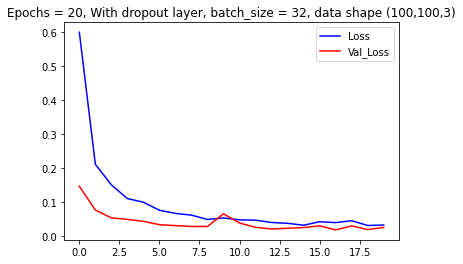

In [8]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'],'b',label = "Loss")
plt.plot(model.history.history['val_loss'],'r',label = "Val_Loss")
plt.title("Epochs = 20, With dropout layer, batch_size = 32, data shape (100,100,3)")
plt.legend()
plt.show()

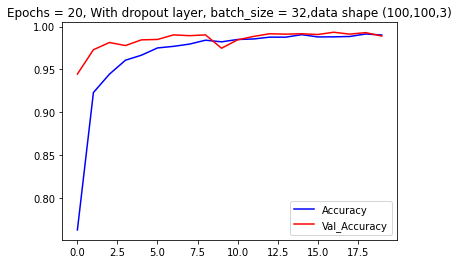

In [9]:
plt.plot(model.history.history['accuracy'],'b',label = "Accuracy")
plt.plot(model.history.history['val_accuracy'],'r',label = "Val_Accuracy")
plt.title("Epochs = 20, With dropout layer, batch_size = 32,data shape (100,100,3)")
plt.legend()
plt.show()

In [11]:
model.save('/content/drive/MyDrive/DL/model_3_final_9.h5')